In [8]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
%matplotlib inline

# Regression Analysis: Seasonal Effects with Sklearn Linear Regression
In this notebook, you will build a SKLearn linear regression model to predict Yen futures ("settle") returns with *lagged* CAD/JPY exchange rate returns. 

In [2]:
# Currency pair exchange rates for CAD/JPY
cad_jpy_df = pd.read_csv(
    Path("cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [4]:
# Trim the dataset to begin on January 1st, 1990
cad_jpy_df = cad_jpy_df.loc["1990":, :]
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


# Data Preparation

### Returns

In [5]:
# Create a series using "Price" percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
cad_jpy_df['Returns'] = cad_jpy_df['Price'].pct_change()
cad_jpy_df.dropna(inplace=True)

In [6]:
cad_jpy_df.head()

,Price,Open,High,Low,Returns
Date,,,,,
1990-01-03,125.30,125.24,125.30,125.24,-0.008467
1990-01-04,123.46,123.41,123.46,123.41,-0.014685
1990-01-05,124.54,124.48,124.54,124.48,0.008748
1990-01-08,124.27,124.21,124.27,124.21,-0.002168
1990-01-09,125.10,125.04,125.10,125.04,0.006679


### Lagged Returns 

In [7]:
# Create a lagged return using the shift function
cad_jpy_df['Lagged_Return'] = cad_jpy_df['Returns'].shift(1)
cad_jpy_df.dropna(inplace=True)
cad_jpy_df.head()

,Price,Open,High,Low,Returns,Lagged_Return
Date,,,,,,
1990-01-04,123.46,123.41,123.46,123.41,-0.014685,-0.008467
1990-01-05,124.54,124.48,124.54,124.48,0.008748,-0.014685
1990-01-08,124.27,124.21,124.27,124.21,-0.002168,0.008748
1990-01-09,125.10,125.04,125.10,125.04,0.006679,-0.002168
1990-01-10,125.81,125.75,125.81,125.75,0.005675,0.006679


### Train Test Split

In [11]:
# Create a train/test split for the data using 2018-2019 for testing and the rest for training
train = cad_jpy_df[:'2017']
test = cad_jpy_df['2018':]

In [12]:
train.head()

,Price,Open,High,Low,Returns,Lagged_Return
Date,,,,,,
1990-01-04,123.46,123.41,123.46,123.41,-0.014685,-0.008467
1990-01-05,124.54,124.48,124.54,124.48,0.008748,-0.014685
1990-01-08,124.27,124.21,124.27,124.21,-0.002168,0.008748
1990-01-09,125.10,125.04,125.10,125.04,0.006679,-0.002168
1990-01-10,125.81,125.75,125.81,125.75,0.005675,0.006679


In [13]:
test.head()

,Price,Open,High,Low,Returns,Lagged_Return
Date,,,,,,
2018-01-01,89.80,89.59,89.83,89.56,0.002456,-0.002561
2018-01-02,89.75,89.83,90.00,89.39,-0.000557,0.002456
2018-01-03,89.76,89.76,89.84,89.51,0.000111,-0.000557
2018-01-04,90.30,89.75,90.32,89.69,0.006016,0.000111
2018-01-05,91.13,90.31,91.61,90.23,0.009192,0.006016


In [14]:
# Create four dataframes:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
X_train = train['Lagged_Return'].to_frame()
X_test = test['Lagged_Return'].to_frame()
y_train = train['Returns']
y_test = test['Returns']

In [15]:
# Preview the X_train data
X_train.head()

,Lagged_Return
Date,
1990-01-04,-0.008467
1990-01-05,-0.014685
1990-01-08,0.008748
1990-01-09,-0.002168
1990-01-10,0.006679


# Linear Regression Model

In [16]:
# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

# Fit a SKLearn linear regression using  just the training set (X_train, Y_train):
# YOUR CODE HERE!

In [18]:
model = LinearRegression(fit_intercept=True)

In [22]:
model.fit(X_train, y_train)

LinearRegression()

# Make predictions using the Testing Data

**Note:** We want to evaluate the model using data that it has never seen before, in this case: `X_test`.

In [21]:
# Make a prediction of "y" values using just the test dataset
y_pred = model.predict(X_test)

In [23]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
results = y_test.to_frame()
results['Predicted returns'] = y_pred
results.head()

,Returns,Predicted returns
Date,,
2018-01-01,0.002456,0.000054
2018-01-02,-0.000557,-0.000073
2018-01-03,0.000111,0.000003
2018-01-04,0.006016,-0.000014
2018-01-05,0.009192,-0.000164


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

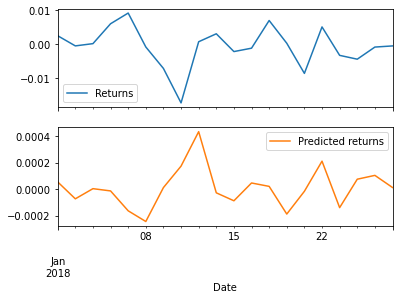

In [24]:
# Plot the first 20 predictions vs the true values
results[:20].plot(subplots=True)

# Out-of-Sample Performance

Evaluate the model using "out-of-sample" data (`X_test` and `y_test`)

In [26]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
root_mean = np.sqrt(mse)
std = np.std(y_test)

In [28]:
print(f"The r2 is {r2}")
print(f"The mse is {mse}")
print(f"The rmse is {root_mean}")
print(f"The stdev is {std}")

The r2 is 0.005394294299271962
The mse is 4.15484105880405e-05
The rmse is 0.006445805658569028
The stdev is 0.00646326159861874


In [25]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# (Hint: use the dataframe from above)
# YOUR CODE HERE!

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
# YOUR CODE HERE!

# In-Sample Performance

Evaluate the model using in-sample data (X_train and y_train)

In [30]:
y_train_df = y_train.to_frame()
y_train_df['in_sample'] = model.predict(X_train)
y_train_df.head()

,Returns,in_sample
Date,,
1990-01-04,-0.014685,0.000204
1990-01-05,0.008748,0.000362
1990-01-08,-0.002168,-0.000233
1990-01-09,0.006679,0.000044
1990-01-10,0.005675,-0.000181


In [31]:
mse_in_sample = mean_squared_error(y_train_df['Returns'], y_train_df['in_sample'])
root_mean_in_sample = np.sqrt(mse_in_sample)

In [32]:
print(f"The mse in sample is {mse_in_sample}")
print(f"The rmse in sample is {root_mean_in_sample}")

The mse in sample is 7.089549618224989e-05
The rmse in sample is 0.00841994632894117


In [14]:
# Construct a dataframe using just the "y" training data:
# YOUR CODE HERE!

# Add a column of "in-sample" predictions to that dataframe:  
# YOUR CODE HERE!

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!

In-sample Root Mean Squared Error (RMSE): 0.841994632894117


# Conclusions

**Question:** Does this model perform better or worse on out-of-sample data as compared to in-sample data?

**Answer:** YOUR ANSWER HERE

Based on rhe rmse the lower out of sample performance suggest it performs better out of sample